Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras


In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
theFolder = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/")

files = [file for file in theFolder.iterdir() if file.is_dir()]
files


[PosixPath('/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Test')]

In [5]:
## Now we have the files uploaded to drive is available for use.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion

In [6]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Test')

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               label_mode='categorical',
                                                               seed=123,
                                                               image_size = (img_height, img_width),
                                                               batch_size = batch_size)



Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             validation_split = 0.2,
                                                             subset="validation",
                                                             label_mode='categorical',
                                                             seed=123,
                                                             image_size = (img_height, img_width),
                                                             batch_size = batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


Learning:

subset in function tf.keras.preprocessing.image_dataset_from_directory()
ValueError: `subset` must be either "training" or "validation", received: 

Only two values are possible

In [12]:
## We are going for 80-20 split for training and validation
### Out of 2239 images, 1792 are selected for training and 447 are selected for validation

In [13]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [14]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [15]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [16]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [17]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print("# of classes : ", len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
# of classes :  9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [18]:
import matplotlib.pyplot as plt


In [19]:
class_name = class_names[0]
file_pattern = class_name + "/*.jpg"

file_name = str(list(data_dir_train.glob(file_pattern))[0])
file_name

'/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/actinic keratosis/ISIC_0027562.jpg'

In [20]:
## Lets look at the number of images available in each category for training
for class_name in class_names:
  file_pattern = class_name + "/*.jpg"
  count = len(list(data_dir_train.glob(file_pattern)))
  print(class_name, ':', count)


actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


In [21]:
## Lets look at the number of images available in each category for test
for class_name in class_names:
  file_pattern = class_name + "/*.jpg"
  count = len(list(data_dir_test.glob(file_pattern)))
  print(class_name, ':', count)


actinic keratosis : 16
basal cell carcinoma : 16
dermatofibroma : 16
melanoma : 16
nevus : 16
pigmented benign keratosis : 16
seborrheic keratosis : 3
squamous cell carcinoma : 16
vascular lesion : 3


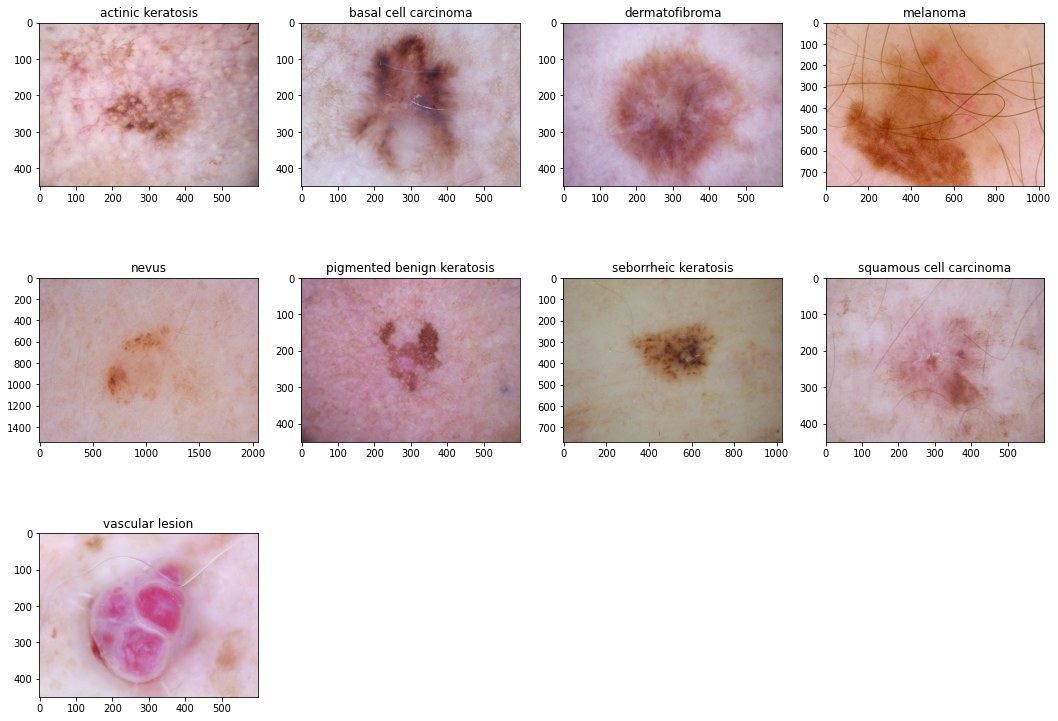

In [ ]:
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(18, 18))
index = 1

for class_name in class_names:
  plt.subplot(4, 4, index)
  file_pattern = class_name + "/*.jpg"
  file_name = str(list(data_dir_train.glob(file_pattern))[35])

  picture = plt.imread(file_name)
  plt.title(class_name)
  plt.imshow(picture)
  index = index+1


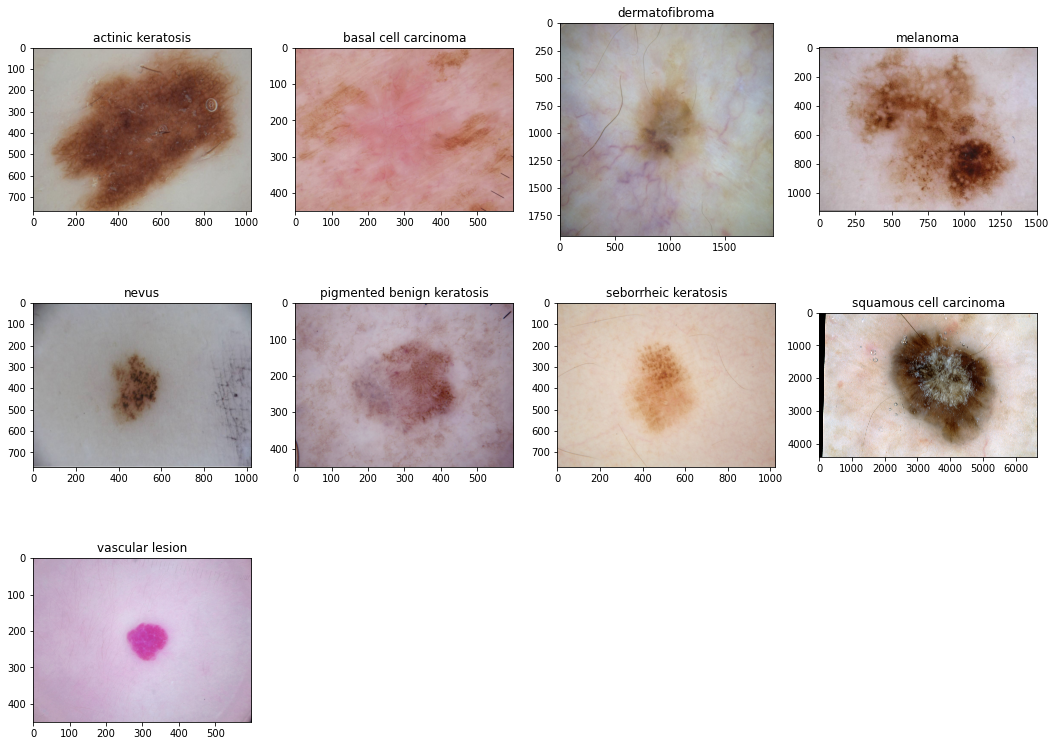

In [ ]:
### Lets look at the test data set also
plt.figure(figsize=(18, 18))
index = 1

for class_name in class_names:
  plt.subplot(4, 4, index)
  file_pattern = class_name + "/*.jpg"
  file_name = str(list(data_dir_test.glob(file_pattern))[0])

  picture = plt.imread(file_name)
  plt.title(class_name)
  plt.imshow(picture)
  index = index+1


The training and validation data set seems to be fine as shown above.
I checked couple of images

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
! pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.9 kB/s 
     |████████████████████████████████| 438 kB 64.2 MB/s 
     |████████████████████████████████| 1.6 MB 56.9 MB/s 
     |████████████████████████████████| 5.8 MB 64.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [70]:
### Your code goes here
print(len(class_names))
number_of_classes = len(class_names)
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_of_classes, activation='softmax')
  
])



9


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [71]:
from tensorflow.keras.optimizers import SGD

In [75]:
### Todo, choose an appropirate optimiser and loss function
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [76]:
# View the summary of all layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [78]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  batch_size=batch_size,
  epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 55s 976ms/step - loss: 1.8130 - accuracy: 0.3237 - val_loss: 1.7162 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 54s 973ms/step - loss: 1.7125 - accuracy: 0.3811 - val_loss: 1.5747 - val_accuracy: 0.4452
Epoch 3/20
56/56 [==============================] - 54s 972ms/step - loss: 1.6044 - accuracy: 0.4163 - val_loss: 1.8279 - val_accuracy: 0.3154
Epoch 4/20
56/56 [==============================] - 54s 971ms/step - loss: 1.6572 - accuracy: 0.4124 - val_loss: 1.5591 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 54s 972ms/step - loss: 1.5260 - accuracy: 0.4715 - val_loss: 1.5473 - val_accuracy: 0.4564
Epoch 6/20
56/56 [==============================] - 54s 971ms/step - loss: 1.5239 - accuracy: 0.4531 - val_loss: 1.7385 - val_accuracy: 0.3669
Epoch 7/20
56/56 [==============================] - 54s 970ms/step - loss: 1.5252 - accuracy: 0.4643 - val_loss: 1.4871 - val_accuracy: 0.4855

### Visualizing training results

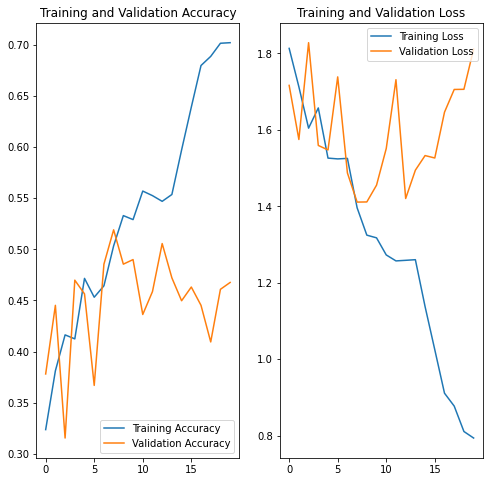

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

It is seen that the validation accuracy is not increasing as with the training accuracy with the epochs.

This is a case of overfitting. Model performs better on the training dataset, but accuracy on the validation dataset is low. The model fails to generalize the patterns.

### In the diagram, we can see that training accuracy is increasing drastically with number of epochs. But the validation accuracy seems to be not improving much with the number of epochs. Same pattern is observed with training and validation loss well. The training loss is decreasing drastically with the number of epochs, but the no significant improvement seen for the validation loss with respect to the number of epochs.

In [80]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                                                   input_shape=(img_height, 
                                                                                                img_width,
                                                                                                3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
                                      ])

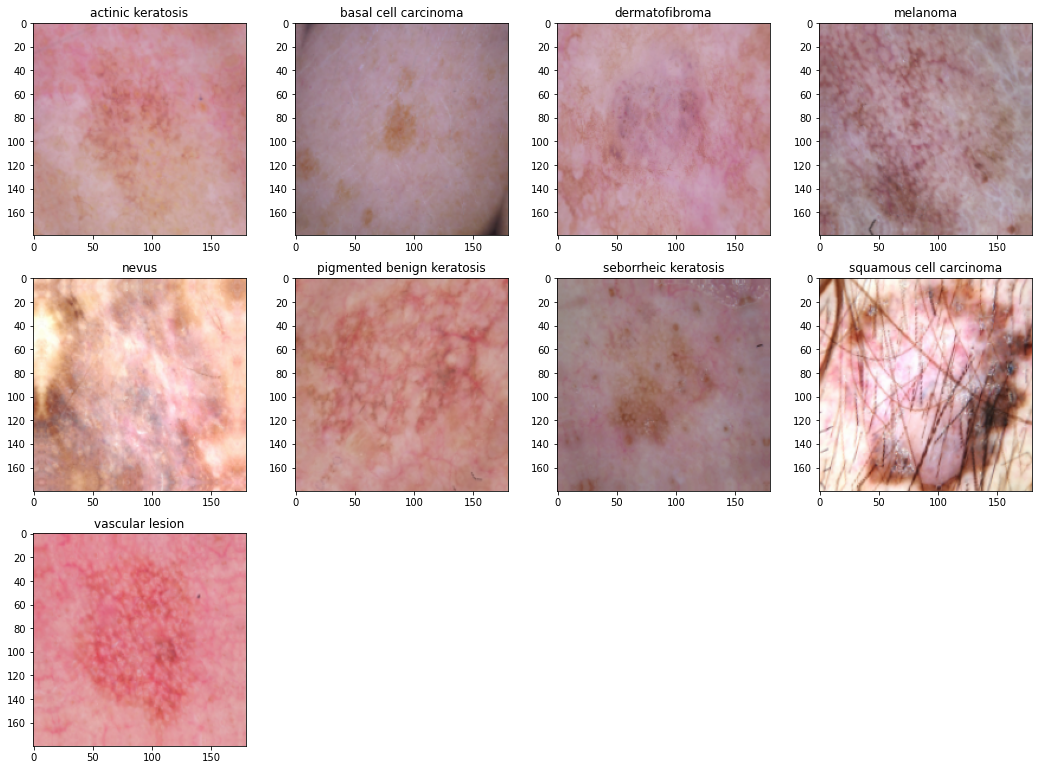

In [82]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(18, 18))
for images, labels in train_ds.take(1):
  for index in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, index + 1)
    plt.imshow(augmented_images[index].numpy().astype("uint8"))
    plt.title(class_names[index])
    

### Todo:
### Create the model, compile and train the model


In [94]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## Adding dropout of 25% after the last convolution
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_of_classes, activation="softmax")
])




### Compiling the model

In [95]:
## Your code goes here
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [96]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

### Training the model

In [97]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 67s 1s/step - loss: 2.1034 - accuracy: 0.2143 - val_loss: 2.0077 - val_accuracy: 0.2103
Epoch 2/20
56/56 [==============================] - 66s 1s/step - loss: 1.8179 - accuracy: 0.3454 - val_loss: 1.7046 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 65s 1s/step - loss: 1.5738 - accuracy: 0.4336 - val_loss: 1.4842 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 65s 1s/step - loss: 1.4658 - accuracy: 0.4833 - val_loss: 1.4921 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 65s 1s/step - loss: 1.4386 - accuracy: 0.4888 - val_loss: 1.5120 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 65s 1s/step - loss: 1.4290 - accuracy: 0.4944 - val_loss: 1.5549 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 65s 1s/step - loss: 1.3389 - accuracy: 0.5285 - val_loss: 1.3981 - val_accuracy: 0.5391
Epoch 8/20
56/56 [==

### Visualizing the results

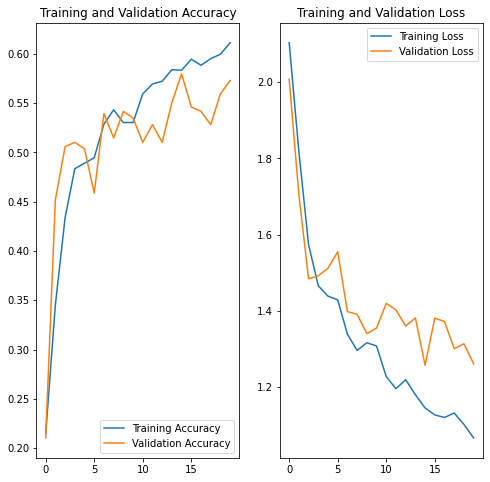

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### After adding augmentation, overfitting has significantly reduced
Training and Validation accuracy trend with respect to number of epochs seems to be same. Same trend is seen for training and validation loss as well.

- Highest validation accuracy is 57.27%
- Highest training accuracy is 61.1%


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [99]:
## Your code goes here.
for class_name in class_names:
  file_pattern = class_name + "/*.jpg"
  count = len(list(data_dir_train.glob(file_pattern)))
  
  print(class_name, ':', count)


actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


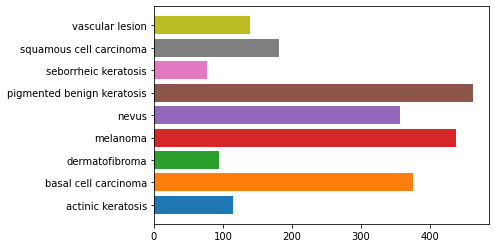

In [100]:
for class_name in class_names:
  file_pattern = class_name + "/*.jpg"
  count = len(list(data_dir_train.glob(file_pattern)))
  plt.barh(class_name,count)
  

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
###       Ans: seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
###       Ans: pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [103]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [101]:
str(data_dir_train)

'/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train'

In [104]:
path_to_training_dataset="/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58DBE37810>: 100%|██████████| 500/500 [00:26<00:00, 18.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58DBF3B610>: 100%|██████████| 500/500 [00:26<00:00, 18.57 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58D7B58690>: 100%|██████████| 500/500 [00:27<00:00, 17.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F58D3231E90>: 100%|██████████| 500/500 [01:54<00:00,  4.36 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7F58DBE6D390>: 100%|██████████| 500/500 [01:31<00:00,  5.48 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58D86F5890>: 100%|██████████| 500/500 [00:23<00:00, 21.47 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F58D3B0FA10>: 100%|██████████| 500/500 [00:50<00:00,  9.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58D7842890>: 100%|██████████| 500/500 [00:22<00:00, 22.51 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5964917610>: 100%|██████████| 500/500 [00:25<00:00, 19.40 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [105]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [106]:
from glob import glob

In [107]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output/melanoma_original_ISIC_0010631.jpg_66432b17-63d4-4cbc-a8ca-8be9bec621a6.jpg',
 '/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output/melanoma_original_ISIC_0000502.jpg_6277b71c-92dc-4c70-89ca-ed35329497bd.jpg',
 '/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output/melanoma_original_ISIC_0010757.jpg_848effca-2641-4a45-9c49-52a7319a11ae.jpg',
 '/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output/melanoma_original_ISIC_0010023.jpg_5e603f78-d274-4413-851c-7a9a6d545080.jpg',
 '/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output/melanoma_original_ISIC_0010478.jpg_b70c3b71-c160-4dee-97ee-0b9edcfb4ef1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train/melanoma/output/melanoma_original_ISIC_0010777.jpg_4d84946d-fcd0-44e2-9327-e480970824ee.jpg',
 '/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/T

In [108]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [109]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [110]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesson_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [111]:
dataframe_dict = dict(zip(path_list, lesson_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [112]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [113]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [114]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [115]:
data_dir_train

PosixPath('/content/drive/MyDrive/Colab Notebooks/nn_assignment_1/Train')

In [116]:
data_dir_train=os.path.join(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split = 0.2,
                                                               subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [117]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [118]:
## your code goes here
normalizlr = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalizlr(x), y))
image_batch, labels_batch = next(iter(normalized_ds))



In [119]:
firstimag = image_batch[0]
# The pixels values are now in `[0,1]`.
print(np.min(firstimag), np.max(firstimag))

0.23088236 0.9950984


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [120]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



#### **Todo:**  Train your model

In [121]:
epochs = 30
## Your code goes here, use 50 epochs.
### Using 30 epochs since the runtime is huge for this dataset.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 236s 1s/step - loss: 1.1972 - accuracy: 0.5393 - val_loss: 1.1623 - val_accuracy: 0.5679
Epoch 2/30
169/169 [==============================] - 230s 1s/step - loss: 1.1556 - accuracy: 0.5605 - val_loss: 1.0769 - val_accuracy: 0.5850
Epoch 3/30
169/169 [==============================] - 227s 1s/step - loss: 1.0744 - accuracy: 0.5920 - val_loss: 1.1365 - val_accuracy: 0.5924
Epoch 4/30
169/169 [==============================] - 226s 1s/step - loss: 1.0356 - accuracy: 0.6033 - val_loss: 1.0745 - val_accuracy: 0.5924
Epoch 5/30
169/169 [==============================] - 227s 1s/step - loss: 1.0074 - accuracy: 0.6194 - val_loss: 1.0721 - val_accuracy: 0.5857
Epoch 6/30
169/169 [==============================] - 226s 1s/step - loss: 0.9715 - accuracy: 0.6317 - val_loss: 1.0099 - val_accuracy: 0.6295
Epoch 7/30
169/169 [==============================] - 226s 1s/step - loss: 0.9401 - accuracy: 0.6413 - val_loss: 1.0432 - val_accuracy: 0.6325
Epoch 8/30

#### **Todo:**  Visualize the model results

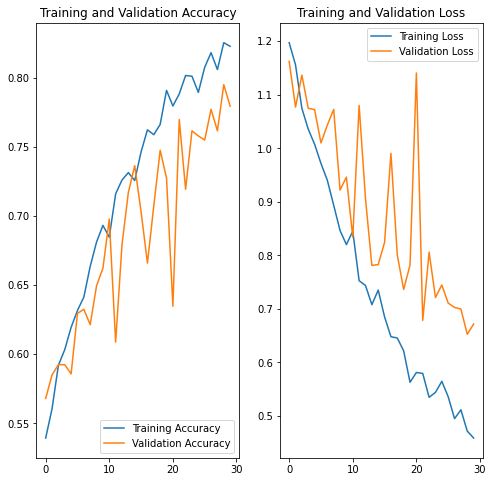

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Findings on the final model
- Final Training Accuracy : 82.29
- Final Validation Accuracy : 77.85

#### The training accuracy and validation accuracy show the same tred
#### The training loss and validation loss also show the same trend
#### Significant improvements observed after Augmentation and handling class imbalance